<a href="https://colab.research.google.com/github/SefaSAHAN/Credit_Score_Predict_ML_Project/blob/main/model_Credit_score_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np  
# from google.colab import files 

import matplotlib.pyplot as plt
import plotly.express as px
import missingno as mnso
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


In [4]:
url_v1_train = 'https://raw.githubusercontent.com/RamaNahawandi/Credit-score-classification/main/v1_train.csv'
train_v1_data = pd.read_csv(url_v1_train)

url_v1_test = 'https://raw.githubusercontent.com/RamaNahawandi/Credit-score-classification/main/v1_test.csv'
test_v1_data = pd.read_csv(url_v1_test)

In [5]:
url_v2_train = 'https://raw.githubusercontent.com/RamaNahawandi/Credit-score-classification/main/v2_train.csv'
train_v2_data = pd.read_csv(url_v2_train)

url_v2_test = 'https://raw.githubusercontent.com/RamaNahawandi/Credit-score-classification/main/v2_test.csv'
test_v2_data = pd.read_csv(url_v2_test)

In [6]:
train_v1_data.describe()


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_Spent,Payment_Behaviour_Value
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,33.311180,4198.256045,5.375940,5.521210,14.500450,3.536980,19.163080,12.688590,9.402323,5.494330,...,1254.324940,31.749476,225.467870,0.833410,94.245915,184.723212,379.909721,1.88830,0.426880,0.797420
std,10.764783,3183.700611,2.577735,2.045632,8.653109,2.441264,12.360174,5.575452,5.558237,3.478458,...,906.331147,4.637620,96.095583,0.923139,89.605855,171.003077,144.546538,0.67512,0.494627,0.802974
min,14.000000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,...,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,174.810670,1.00000,0.000000,0.000000
25%,24.000000,1625.597917,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.420000,3.000000,...,566.072500,28.052567,154.000000,0.000000,30.306660,75.356284,282.544837,1.00000,0.000000,0.000000
50%,33.000000,3099.872500,6.000000,5.000000,13.000000,3.000000,17.000000,12.000000,8.540000,5.000000,...,1103.000000,31.461967,231.000000,0.000000,69.248079,136.173407,337.252465,2.00000,0.000000,1.000000
75%,42.000000,5951.657273,7.000000,7.000000,20.000000,5.000000,26.000000,17.000000,12.890000,8.000000,...,1624.800000,35.654356,292.000000,2.000000,133.355905,223.601031,433.426306,2.00000,1.000000,1.000000
max,56.000000,15204.633333,11.000000,11.000000,34.000000,9.000000,54.000000,23.000000,23.500000,13.000000,...,4073.710000,40.199897,404.000000,2.000000,437.012753,1060.345333,864.074274,3.00000,1.000000,2.000000


<Figure size 1800x600 with 0 Axes>

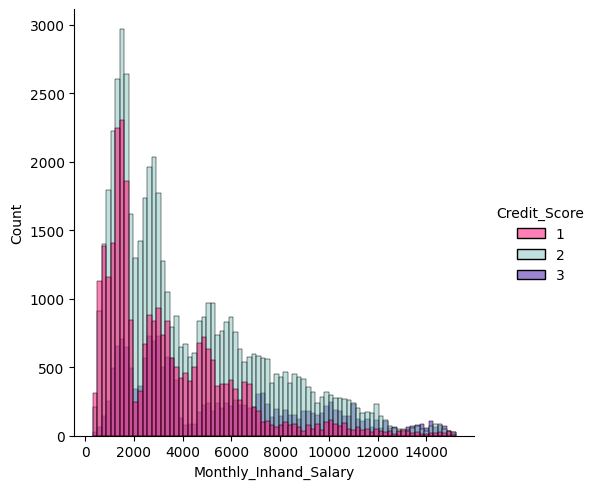

<Figure size 1800x600 with 0 Axes>

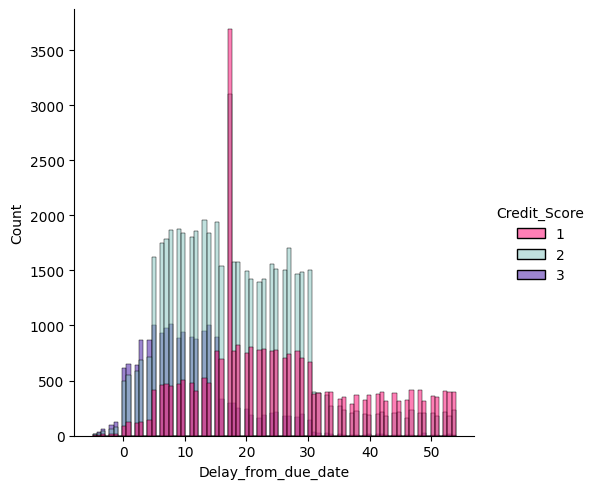

<Figure size 1800x600 with 0 Axes>

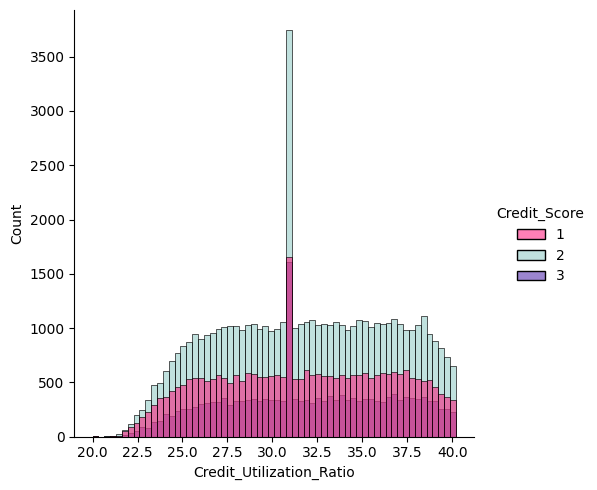

In [9]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=train_v1_data, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>,
      

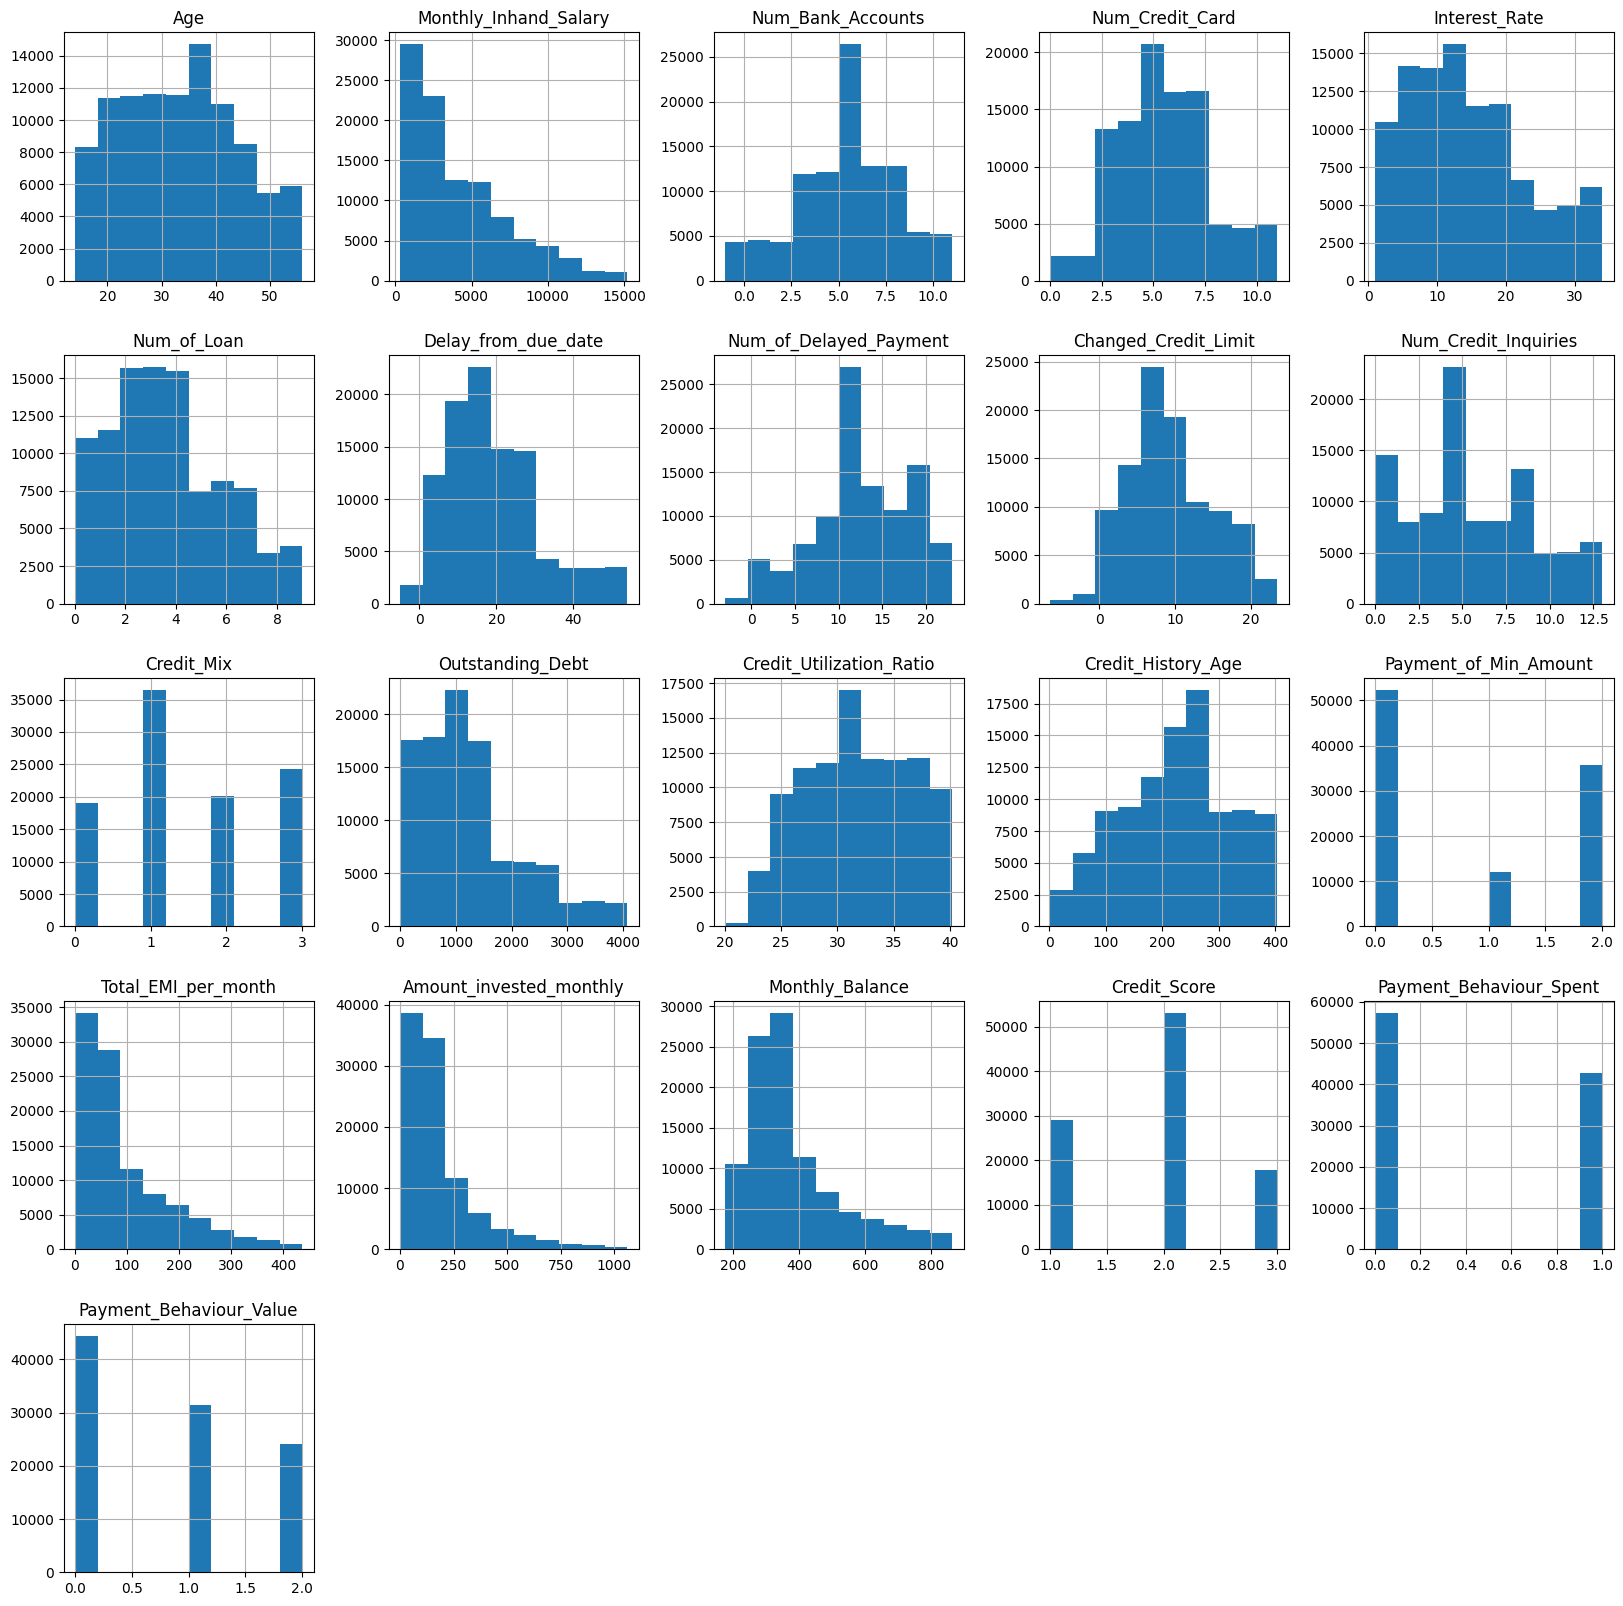

In [ ]:
train_v1_data.hist(figsize=(20,20))


<Figure size 1200x800 with 0 Axes>

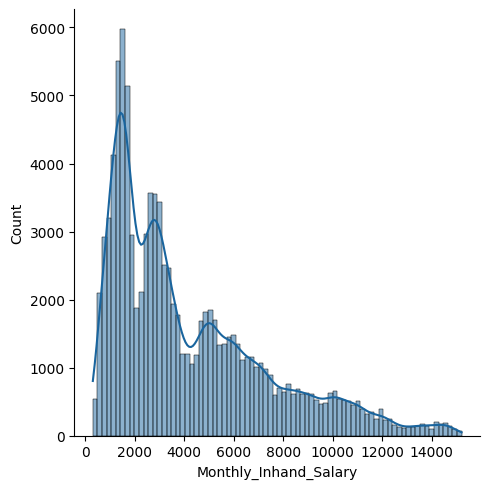

In [45]:
plt.figure(figsize=(12,8))
sns.displot(data=train_v1_data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

In [ ]:
objCols = ['Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Payment_of_Min_Amount','Amount_invested_monthly']
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=train_v1_data, hue="Credit_Score")
    plt.show()
    
    
   

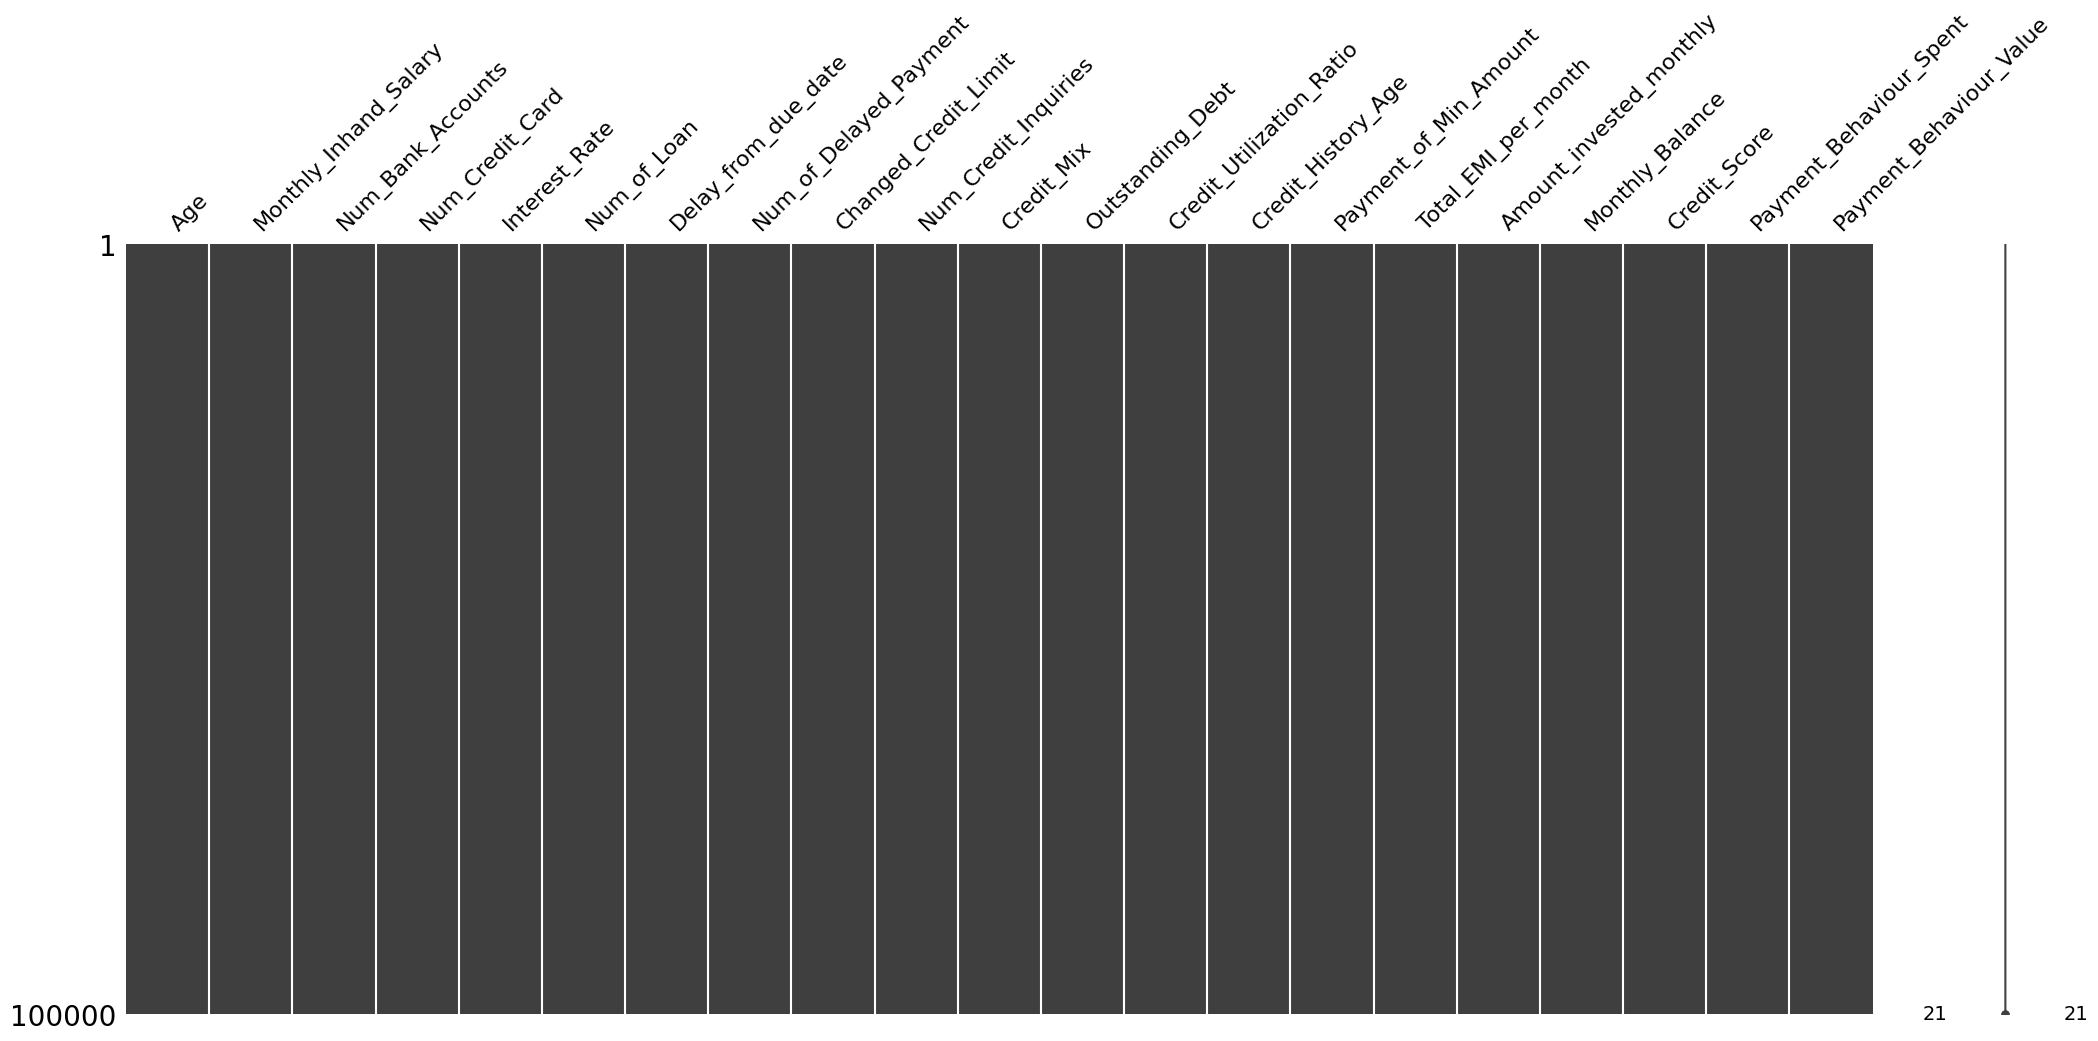

In [ ]:
mnso.matrix(train_v1_data)
plt.show()

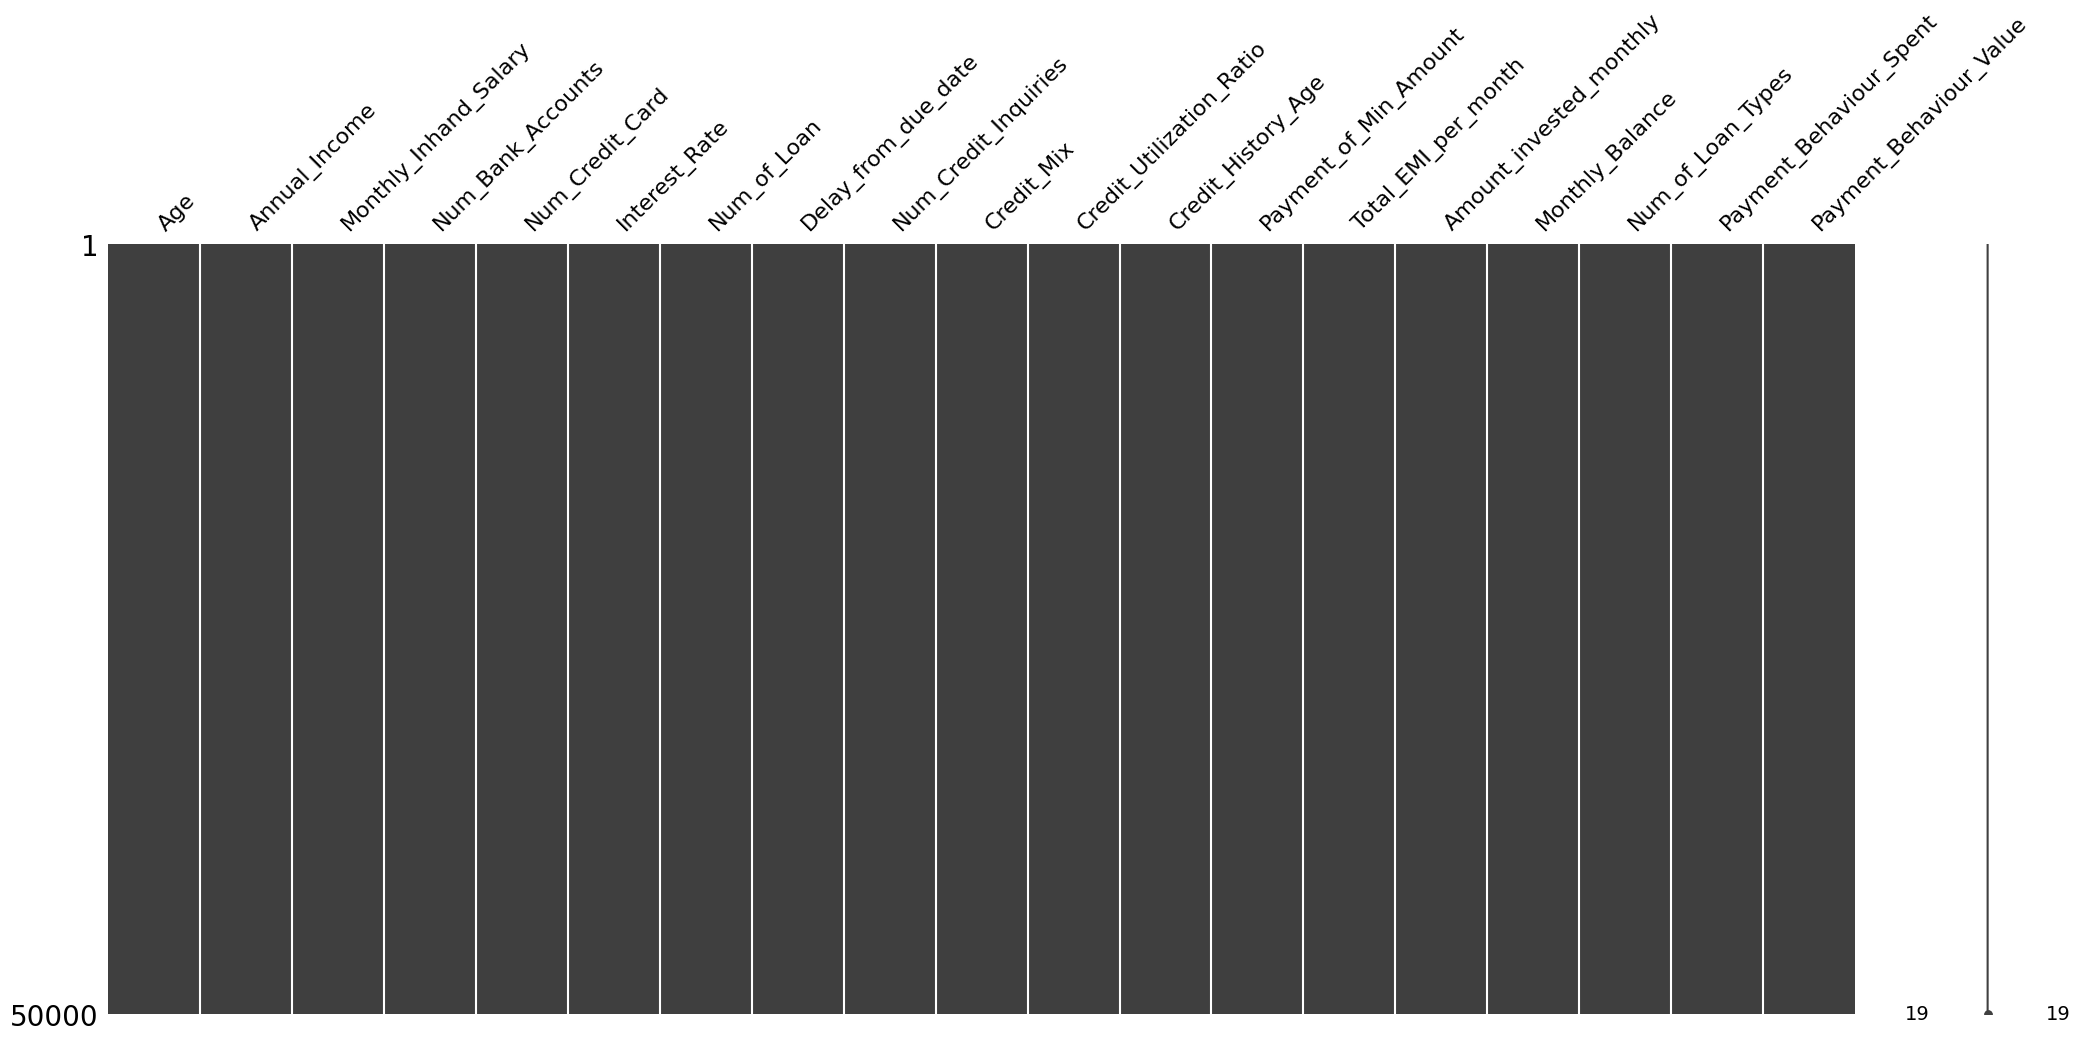

In [ ]:
mnso.matrix(test_v1_data)
plt.show()

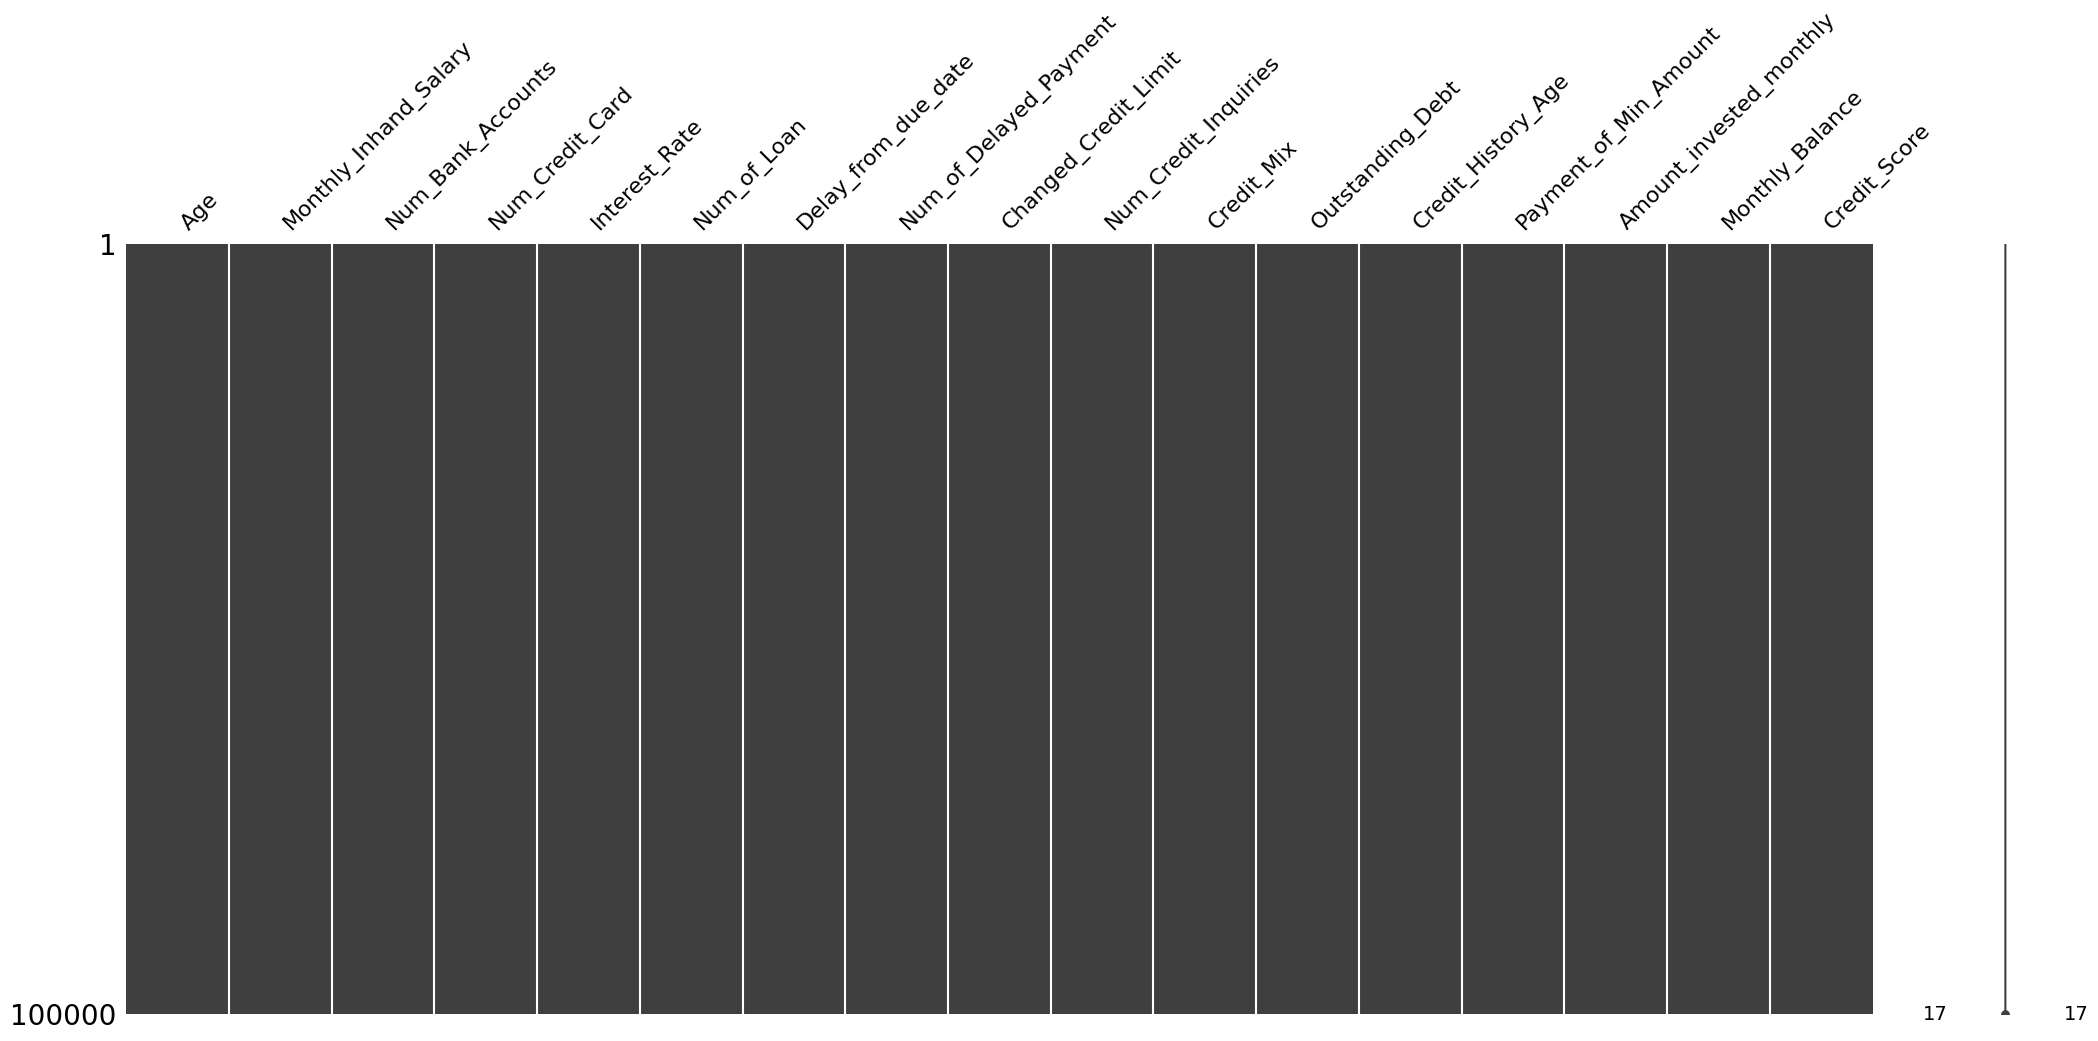

In [ ]:
mnso.matrix(train_v2_data)
plt.show()

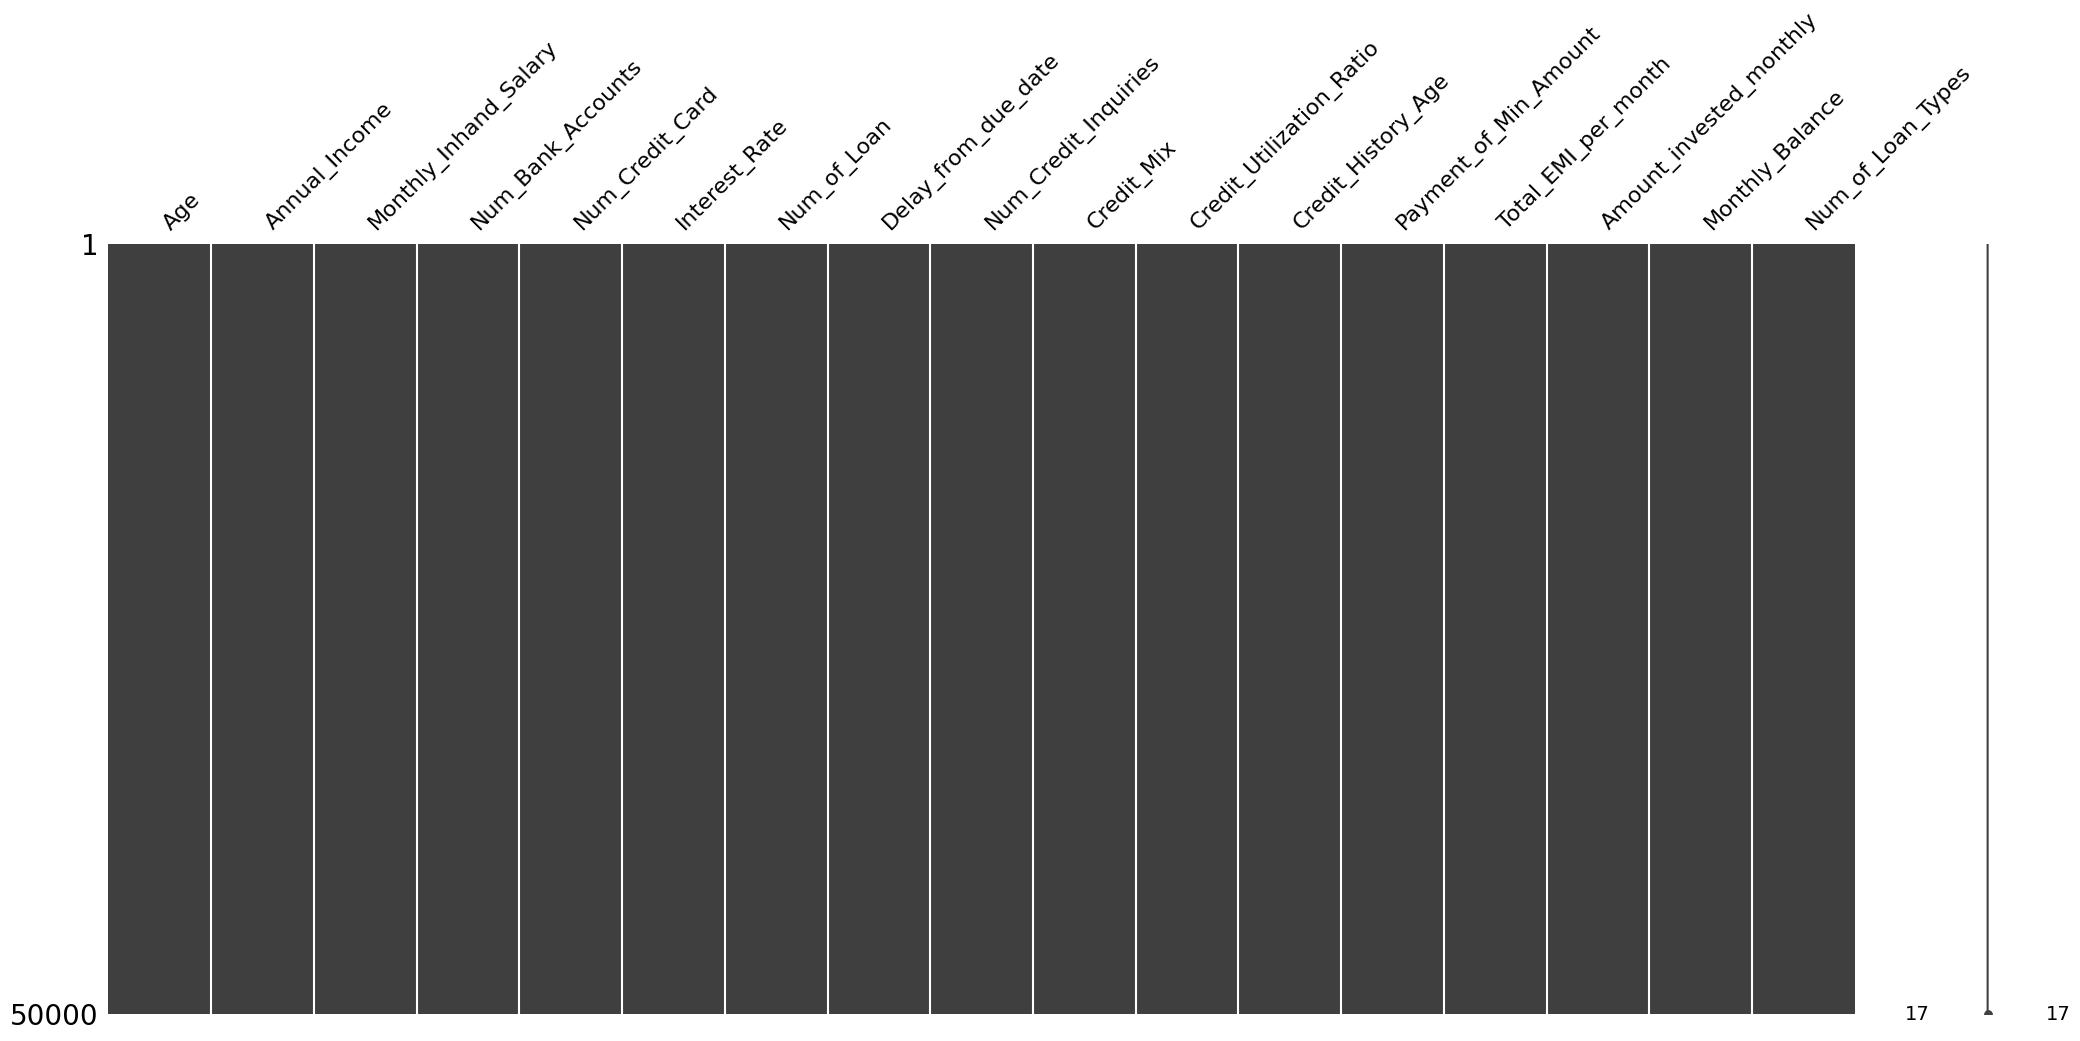

In [ ]:
mnso.matrix(test_v2_data)
plt.show()

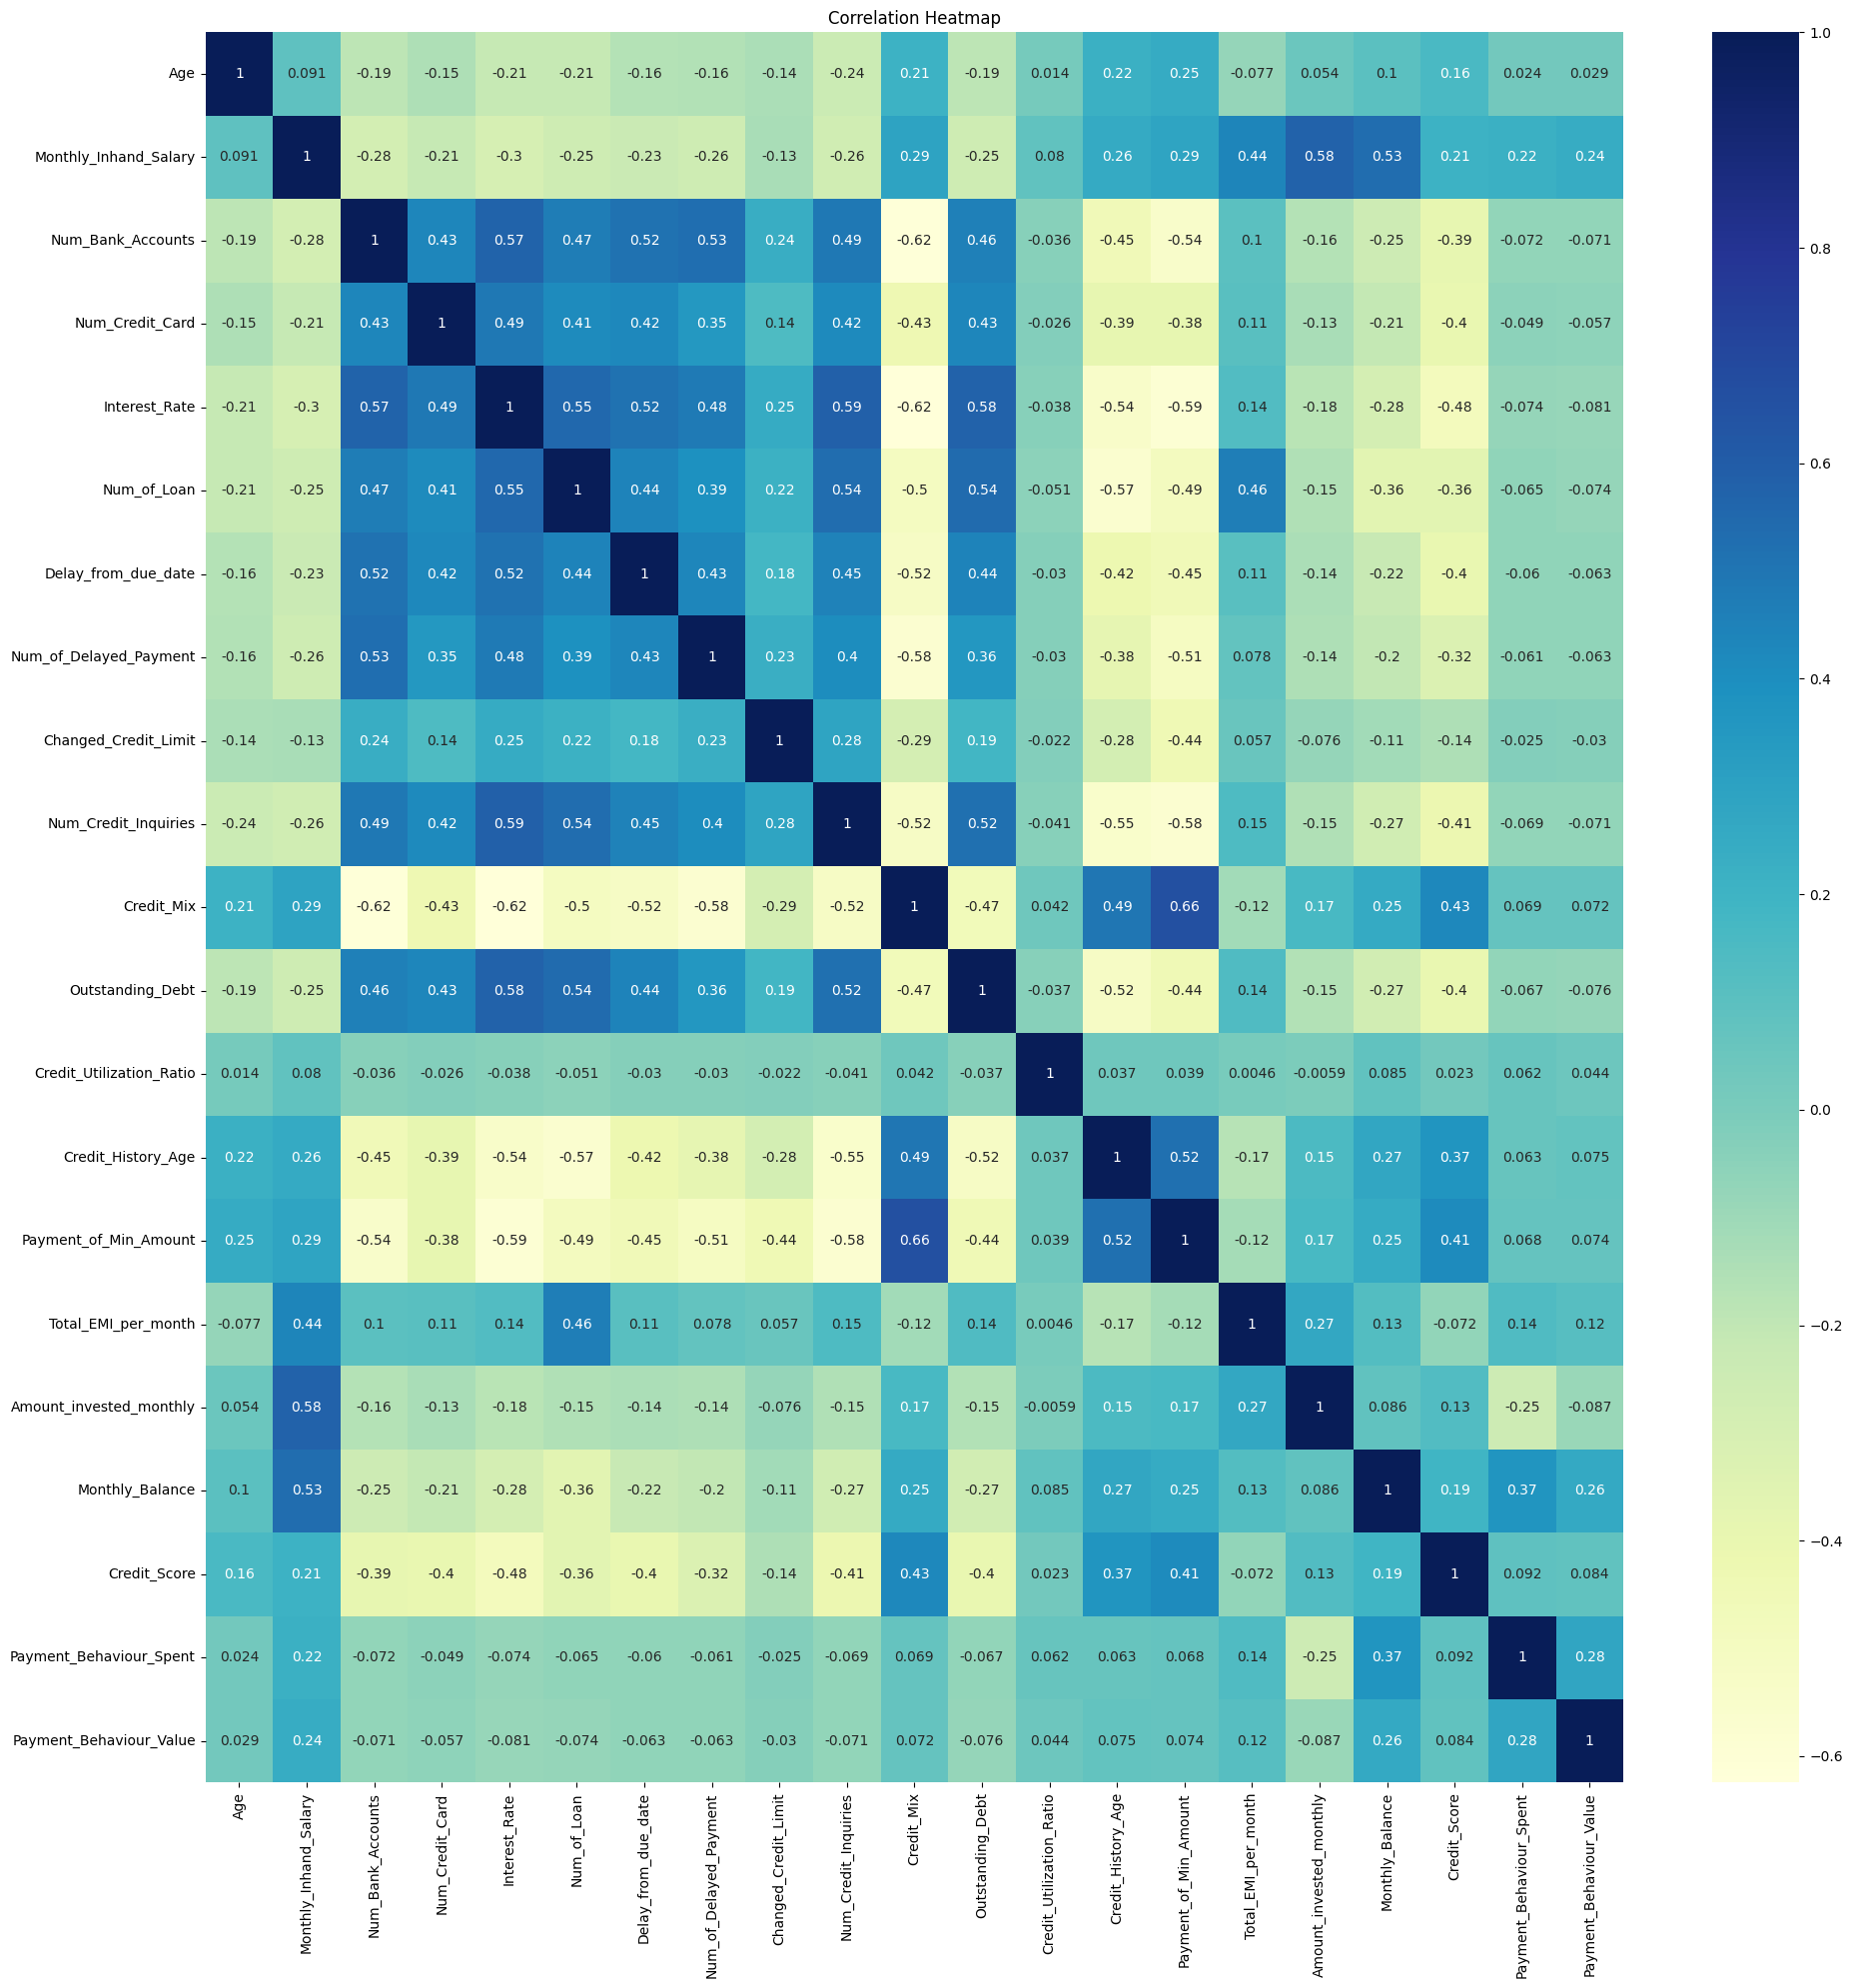

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(train_v1_data.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.tight_layout()

In [ ]:
X = train_v1_data.drop("Credit_Score", axis=1)
y = train_v1_data["Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Instantiate individual classifiers
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(max_depth=8, random_state=24)
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_features="log2", random_state = 24)

# Define a list of classifiers that contains (classifier_name, classifier)
classifiers=[("K Nearest Neighbors", knn),
             ("Decision Tree", dt),
             ("Random Forest", rf)]

for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    # predict the labels of the test set
    y_pred = clf.predict(X_test)
    # evaluate the accuracy of clf on the test set
    print("{:s} : {:.3f}".format(clf_name, accuracy_score(y_test, y_pred)))

K Nearest Neighbors : 0.657
Decision Tree : 0.696
Random Forest : 0.794


In [ ]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluate the test-set accuracy of 'vc'
print("Voting Classifier: {}".format(round(accuracy_score(y_test, y_pred),3))) 

Voting Classifier: 0.766
